In [1]:
import ipyrad as ip
import ipyrad.analysis as ipa
import pandas as pd
import ipyparallel as ipp

# connect to parallel client
#while len(ipyclient) < 4: 
#ipyclient = ipp.Client()
#ip.cluster_info(ipyclient)

print('ipyrad', ipa.__version__)

ipyrad 0.9.41


### 1. Read in the data files

The internal barcodes are dual indexed, meaning the combination of barcodes attached to R1 and R2 identify samples, 
so the barcodes file lists two barcodes for each sample.  
Plates a identified by i7 and i5, so were demultiplexed in bcl2fastq2 v.2.20.0.422.
They do not have PCR duplicate identifiers.

In [ ]:
BARCODES_Native1 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/Native1_Innerbarcodes.txt"
BARCODES_Native3 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/Native3_Innerbarcodes.txt"
BARCODES_Native4 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/Native4_Innerbarcodes.txt"
BARCODES_Native5 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/Native5_Innerbarcodes.txt"
BARCODES_Native6 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/Native6_Innerbarcodes.txt"
READS_Native1 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/NS_Kerin_Native1_S8_R*.gz"
READS_Native3 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/NS_Kerin_Native3_S1_R*.gz"
READS_Native4 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/NS_Kerin_Native4_S2_R*.gz"
READS_Native5 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/NS_Kerin_Native5_S3_R*.gz"
READS_Native6 = "/moto/eaton/users/slh2181/Pmontana/illumina_runs/NS_Kerin_Native6_S4_R*.gz"

### 2. Demultiplex Sequenced Run 2 on internal indices
We pass 5 plates and barcode files separately to step 1 of ipyrad to demultiplex to samples. 

Plate Native1

In [ ]:
# create an Assembly object with a barcodes file
Native1 = ip.Assembly("demux_Native1")
Native1.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
Native1.params.barcodes_path = BARCODES_Native1
Native1.params.raw_fastq_path = READS_Native1
Native1.params.datatype = "pair3rad"
Native1.params.restriction_overhang = ("GCTAGA", "TAATTC")

In [ ]:
# run demultiplexing of plate Native1
Native1.run('1', auto=True, force=True)

Plate Native3

In [ ]:
# create an Assembly object with a barcodes file
Native3 = ip.Assembly("demux_Native3")
Native3.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
Native3.params.barcodes_path = BARCODES_Native3
Native3.params.raw_fastq_path = READS_Native3
Native3.params.datatype = "pair3rad"
Native3.params.restriction_overhang = ("GCTAGA", "TAATTC")

In [ ]:
# run demultiplexing of plate Native3
Native3.run('1', auto=True, force=True)

Plate Native4

In [ ]:
# create an Assembly object with a barcodes file
Native4 = ip.Assembly("demux_Native4")
Native4.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
Native4.params.barcodes_path = BARCODES_Native4
Native4.params.raw_fastq_path = READS_Native4
Native4.params.datatype = "pair3rad"
Native4.params.restriction_overhang = ("GCTAGA", "TAATTC")

In [ ]:
# run demultiplexing of plate Native4
Native4.run('1', auto=True, force=True)

Plate Native5

In [ ]:
# create an Assembly object with a barcodes file
Native5 = ip.Assembly("demux_Native5")
Native5.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
Native5.params.barcodes_path = BARCODES_Native5
Native5.params.raw_fastq_path = READS_Native5
Native5.params.datatype = "pair3rad"
Native5.params.restriction_overhang = ("GCTAGA", "TAATTC")

In [ ]:
# run demultiplexing of plate Native5
Native5.run('1', auto=True, force=True)

Plate Native6

In [ ]:
# create an Assembly object with a barcodes file
Native6 = ip.Assembly("demux_Native6")
Native6.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
Native6.params.barcodes_path = BARCODES_Native6
Native6.params.raw_fastq_path = READS_Native6
Native6.params.datatype = "pair3rad"
Native6.params.restriction_overhang = ("GCTAGA", "TAATTC")

In [ ]:
# run demultiplexing of plate Native6
Native6.run('1', auto=True, force=True)

### Merge samples from all demultiplexed libraries together
Start here to run step 2-7 of ipyrad.  Below we load these 5 assemblies from the demultiplexed fastq files that will be uploaded to SRA. 

In [2]:
FQ1 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_US1_fastqs/*.gz"
FQ2 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_US2_fastqs/*.gz"
FQ3 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_Native1_fastqs/*.gz"
FQ4 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_Native2_fastqs/*.gz"
FQ5 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_Native3_fastqs/*.gz"
FQ6 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_Native4_fastqs/*.gz"
FQ7 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_Native5_fastqs/*.gz"
FQ8 = "/moto/eaton/users/slh2181/Pmontana/ipyrad/demux_Native6_fastqs/*.gz"

In [3]:
# load each library from demux'd fastq files
lib1 = ip.Assembly("US1")
lib1.params.sorted_fastq_path = FQ1
lib1.params.datatype = "pair3rad"
lib1.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib2 = ip.Assembly("US2")
lib2.params.sorted_fastq_path = FQ2
lib2.params.datatype = "pair3rad"
lib2.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib3 = ip.Assembly("Native1")
lib3.params.sorted_fastq_path = FQ3
lib3.params.datatype = "pair3rad"
lib3.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib4 = ip.Assembly("Native2")
lib4.params.sorted_fastq_path = FQ4
lib4.params.datatype = "pair3rad"
lib4.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib5 = ip.Assembly("Native3")
lib5.params.sorted_fastq_path = FQ5
lib5.params.datatype = "pair3rad"
lib5.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib6 = ip.Assembly("Native4")
lib6.params.sorted_fastq_path = FQ6
lib6.params.datatype = "pair3rad"
lib6.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib7 = ip.Assembly("Native5")
lib7.params.sorted_fastq_path = FQ7
lib7.params.datatype = "pair3rad"
lib7.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

lib8 = ip.Assembly("Native6")
lib8.params.sorted_fastq_path = FQ8
lib8.params.datatype = "pair3rad"
lib8.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"

New Assembly: US1
New Assembly: US2
New Assembly: Native1
New Assembly: Native2
New Assembly: Native3
New Assembly: Native4
New Assembly: Native5
New Assembly: Native6


In [4]:
# digest the Glycine max genome and write as fastq data
dg1 = ipa.digest_genome(
    fasta="/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/GCA_003349995.1_Gmax_ZH13_genomic.fna.gz",
    name="soybean",
    workdir="/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/soybean/",
    re1="GCTAGA",
    re2="TAATTC",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=50,
)
dg1.run()

# digest the Medicago trunculata genome and write as fastq data
dg2 = ipa.digest_genome(
    fasta="/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/GCA_003473485.2_MtrunA17r5.0-ANR_genomic.fna.gz",
    name="medicago",
    workdir="/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/medicago/",
    re1="GCTAGA",
    re2="TAATTC",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=50,
)
dg2.run()

# digest the Phaseolus vulgaris genome and write as fastq data
dg3 = ipa.digest_genome(
    fasta="/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/GCA_000499845.1_PhaVulg1_0_genomic.fna.gz",
    name="bean",
    workdir="/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/bean/",
    re1="GCTAGA",
    re2="TAATTC",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=50,
)
dg3.run()

extracted 63652 reads
extracted 25307 reads
extracted 26780 reads


In [6]:
lib9 = ip.Assembly("soybean")              #This is soybean digested reference
lib9.params.sorted_fastq_path = "/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/soybean/soybean_R*_.fastq.gz"
lib9.params.datatype = "pair3rad"
lib9.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
lib9.params.restriction_overhang = ("GCTAGA", "TAATTC")


lib10 = ip.Assembly("medicago")              #This is medicago digested reference
lib10.params.sorted_fastq_path = "/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/medicago/medicago_R*_.fastq.gz"
lib10.params.datatype = "pair3rad"
lib10.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
lib10.params.restriction_overhang = ("GCTAGA", "TAATTC")


lib11 = ip.Assembly("bean")              #This is phaseolus digested reference
lib11.params.sorted_fastq_path = "/moto/eaton/users/slh2181/Pmontana/ipyrad/outgroup_ref/bean/bean_R*_.fastq.gz"
lib11.params.datatype = "pair3rad"
lib11.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/"
lib11.params.restriction_overhang = ("GCTAGA", "TAATTC")

lib9.run('1', force=True, auto=True)
lib10.run('1', force=True, auto=True)
lib11.run('1', force=True, auto=True)

New Assembly: soybean
New Assembly: medicago
New Assembly: bean
Parallel connection | t103: 24 cores
[####################] 100% 0:00:10 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:07 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:08 | loading reads        | s1 |


In [11]:
lib9.stats

,state,reads_raw
soybean,1,636520


In [7]:
# run step 1 to load fastq files 
lib1.run('1', force=True, auto=True)
lib2.run('1', force=True, auto=True)
lib3.run('1', force=True, auto=True)
lib4.run('1', force=True, auto=True)
lib5.run('1', force=True, auto=True)
lib6.run('1', force=True, auto=True)
lib7.run('1', force=True, auto=True)
lib8.run('1', force=True, auto=True)

Parallel connection | t103: 24 cores
[####################] 100% 0:00:17 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:18 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:18 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:19 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:20 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:21 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:21 | loading reads        | s1 |
Parallel connection | t103: 24 cores
[####################] 100% 0:00:22 | loading reads        | s1 |


### Merge samples and assemblies to run ipyrad on all samples

In [8]:
# create a merged assembly
merged = ip.merge(
    name="kudzu", 
    assemblies=[lib1, lib2, lib3, lib4, lib5, lib6, lib7, lib8, lib9, lib10, lib11],
    )
merged.save()

New Assembly: kudzu


In [9]:
merged.params

0   assembly_name               kudzu                                        
1   project_dir                 ./ipyrad                                     
2   raw_fastq_path              Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
3   barcodes_path               Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
4   sorted_fastq_path           Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
5   assembly_method             denovo                                       
6   reference_sequence                                                       
7   datatype                    pair3rad                                     
8   restriction_overhang        ('TGCAG', '')                                
9   max_low_qual_bases          5                                            
10  phred_Qscore_offset         33                                    

In [10]:
# set params for all assemblies
#assembly_name = "kudzu" #0
merged.params.project_dir = "/moto/eaton/users/slh2181/Pmontana/ipyrad/" #1
#raw_fastq_path =   #2
#barcodes_path    #3
#sorted_fastq_path   #4
merged.params.assembly_method = "denovo"    #5
#reference_sequence    #6
merged.params.datatype = "pair3rad"         #7
merged.params.restriction_overhang = ("GCTAGA", "TAATTC")   #8
merged.params.max_low_qual_bases = 5        #9
merged.params.phred_Qscore_offset = 33     #10
merged.params.mindepth_statistical = 8     #11
merged.params.mindepth_majrule = 4         #12
merged.params.maxdepth = 10000             #13
#merged.params.clust_threshold = .90       #14
merged.params.max_barcode_mismatch = 1     #15
merged.params.filter_adapters = 3          #16
merged.params.filter_min_trim_len = 40  #17
merged.params.max_alleles_consens = 2      #18
merged.params.max_Ns_consens = 0.05        #19
merged.params.max_Hs_consens = 0.05        #20
merged.params.min_samples_locus = 20       #21
merged.params.max_SNPs_locus = .2          #22
merged.params.max_Indels_locus = 8         #23
merged.params.max_shared_Hs_locus = 0.3    #24
#trim_reads                                #25
#trim_loci                                 #26
merged.params.output_formats = "pslv"      #27
#merged.params.pop_assign_file = 1         #28
merged.params

0   assembly_name               kudzu                                        
1   project_dir                 ./ipyrad                                     
2   raw_fastq_path              Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
3   barcodes_path               Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
4   sorted_fastq_path           Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
5   assembly_method             denovo                                       
6   reference_sequence                                                       
7   datatype                    pair3rad                                     
8   restriction_overhang        ('GCTAGA', 'TAATTC')                         
9   max_low_qual_bases          5                                            
10  phred_Qscore_offset         33                                    

In [11]:
#The second step is the same for all.  This takes ~34 minutes
merged.run("2", force=True, auto=True)

Parallel connection | t103: 24 cores
[####################] 100% 0:00:21 | concatenating inputs | s2 |
[####################] 100% 1:04:43 | processing reads     | s2 |


### Dataset 4: Clustering threshold 91%

In [16]:
# rename assembly to vary parameters.
kudzu_91 = merged.branch("kudzu_91")
kudzu_91.params.clust_threshold = .91       #14
kudzu_91.params.output_formats= "psl"
kudzu_91.params

0   assembly_name               kudzu_91                                     
1   project_dir                 ./ipyrad                                     
2   raw_fastq_path              Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
3   barcodes_path               Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
4   sorted_fastq_path           Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
5   assembly_method             denovo                                       
6   reference_sequence                                                       
7   datatype                    pair3rad                                     
8   restriction_overhang        ('GCTAGA', 'TAATTC')                         
9   max_low_qual_bases          5                                            
10  phred_Qscore_offset         33                                    

In [ ]:
kudzu_91.run("34567", force=True, auto=True)

Parallel connection | t103: 24 cores
[####################] 100% 0:03:59 | join merged pairs    | s3 |
[####################] 100% 0:05:03 | join unmerged pairs  | s3 |
[####################] 100% 0:03:38 | dereplicating        | s3 |
[######              ]  31% 0:47:30 | clustering/mapping   | s3 |

In [7]:
kudzu91_min4= kudzu91.branch("kudzu91_noHC_min4")
kudzu91_min4.params.min_samples_locus = 4
kudzu91_min4.params.max_Ns_consens = .1
kudzu91_min4.params.max_Indels_locus = 15
kudzu91_min4.params.max_shared_Hs_locus = .5
kudzu91_min4.params

0   assembly_name               kudzu91_noHC_min4                            
1   project_dir                 ./ipyrad                                     
2   raw_fastq_path              Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
3   barcodes_path               Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
4   sorted_fastq_path           Merged: US1, US2, Native1, Native2, Native3, Native4, Native5, Native6, soybean, medicago, bean
5   assembly_method             denovo                                       
6   reference_sequence                                                       
7   datatype                    pair3rad                                     
8   restriction_overhang        ('GCTAGA', 'TAATTC')                         
9   max_low_qual_bases          5                                            
10  phred_Qscore_offset         33                                    

In [8]:
kudzu91_min4.run("567", force=True, auto=True)

Parallel connection | t103: 24 cores
[####################] 100% 0:03:19 | calculating depths   | s5 |
[####################] 100% 0:03:17 | chunking clusters    | s5 |
[####################] 100% 1:29:50 | consens calling      | s5 |
[####################] 100% 0:07:19 | indexing alleles     | s5 |
[####################] 100% 0:00:58 | concatenating inputs | s6 |
[####################] 100% 0:37:25 | clustering across    | s6 |
[####################] 100% 0:00:28 | building clusters    | s6 |
[####################] 100% 0:22:30 | aligning clusters    | s6 |
[####################] 100% 0:00:32 | applying filters     | s7 |
[####################] 100% 0:11:28 | building arrays      | s7 |
[####################] 100% 0:14:34 | writing conversions  | s7 |


In [11]:
omit= kudzu91_min4.stats_dfs.s7_samples.sample_coverage > 75
keep = kudzu91_min4.stats_dfs.s7_samples[omit].index.tolist()

keep

['AL12-10KA',
 'AL12-12KA',
 'AL12-14KA',
 'AL12-16KA',
 'AL12-18KA',
 'AL12-19KA',
 'AL12-1KA',
 'AL12-22KA',
 'AL12-5KA',
 'AL12-6KA',
 'AL5-11KA',
 'AL5-14KA',
 'AL5-15KA',
 'AL5-16KA',
 'AL5-18KA',
 'AL5-19KA',
 'AL5-1KA',
 'AL5-21KA',
 'AL5-2KA',
 'AL5-5KA',
 'AR2-10KA',
 'AR2-18KA',
 'AR2-1KA',
 'AR2-22KA',
 'AR2-2KA',
 'AR2-3KA',
 'FL3-17K',
 'FL3-1KA',
 'FL3-4KA',
 'FL3-7KA',
 'FL3-8K',
 'GA3-10K',
 'GA3-11K',
 'GA3-13K',
 'GA3-17K',
 'GA3-21K',
 'GA3-23K',
 'GA3-24K',
 'GA3-7K',
 'GA34-11A',
 'GA34-12A',
 'GA34-13A',
 'GA34-19A',
 'GA34-22A',
 'GA34-23A',
 'GA34-2A',
 'GA34-6A',
 'GA34-7A',
 'GA34-9A',
 'GA36-10KA',
 'GA36-13KA',
 'GA36-14KA',
 'GA36-21KA',
 'GA36-3KA',
 'GA36-6KA',
 'GA96-10KA',
 'GA96-11KA',
 'GA96-12KA',
 'GA96-14KA',
 'GA96-16KA',
 'GA96-20KA',
 'GA96-23KA',
 'GA96-2KA',
 'GA96-3KA',
 'GA96-4KA',
 'GA96-8KA',
 'GA96-9KA',
 'KAN1-10A',
 'KAN1-11',
 'KAN1-15A',
 'KAN1-20',
 'KAN1-3',
 'KAN4-14A',
 'KAN4-20A',
 'KAN4-23A',
 'KAN5-1A',
 'KAN5-2A',
 'KAN5-3A',


In [3]:
import ipyrad as ip
kudzu91_min4 = ip.load_json("/moto/eaton/users/slh2181/Pmontana/ipyrad/kudzu91_noHC_min4.json")

bad= kudzu91_min4.stats_dfs.s7_samples.sample_coverage < 75
notkept = kudzu91_min4.stats_dfs.s7_samples[bad].index.tolist()

notkept

loading Assembly: kudzu91_noHC_min4
from saved path: /moto/eaton/users/slh2181/Pmontana/ipyrad/kudzu91_noHC_min4.json


AttributeError: No such attribute: s7_samples

In [12]:
kudzu91_min6= kudzu91_min4.branch("kudzu91_noHC_min6", subsamples=keep)
kudzu91_min6.params.min_samples_locus = 6
kudzu91_min6.run("7", force=True, auto=True)

Parallel connection | t103: 24 cores
[####################] 100% 0:00:33 | applying filters     | s7 |
[####################] 100% 0:09:14 | building arrays      | s7 |
[####################] 100% 0:11:33 | writing conversions  | s7 |


In [1]:
import ipyrad as ip
import ipyrad.analysis as ipa
print('ipyrad', ipa.__version__)

kudzu91_min4 = ip.load_json("/moto/eaton/users/slh2181/Pmontana/ipyrad/kudzu91_noHC_min4.json")

#omit= kudzu91_min4.stats_dfs.s7_samples.sample_coverage > 75
#keep = kudzu91_min4.stats_dfs.s7_samples[omit].index.tolist()

kudzu91_min20= kudzu91_min4.branch("kudzu91_noHC_min20")#, subsamples=keep)
kudzu91_min20.params.min_samples_locus = 20
kudzu91_min20.run("7", force=True, auto=True)

ipyrad 0.9.41
loading Assembly: kudzu91_noHC_min4
from saved path: /moto/eaton/users/slh2181/Pmontana/ipyrad/kudzu91_noHC_min4.json
Parallel connection | t053: 24 cores
[####################] 100% 0:00:33 | applying filters     | s7 |
[####################] 100% 0:08:36 | building arrays      | s7 |
[####################] 100% 0:06:12 | writing conversions  | s7 |


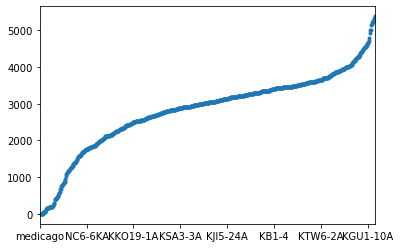

In [26]:
import matplotlib
loci = kudzu91_min20.stats_dfs.s7_samples.sample_coverage.sort_values()
loci.plot(marker = ".", linestyle="None")

In [18]:
omit2= kudzu91_min20.stats_dfs.s7_samples.sample_coverage < 100
notkeep2 = kudzu91_min20.stats_dfs.s7_samples[omit2].index.tolist()

len(notkeep2)

13

In [27]:
omit2= kudzu91_min20.stats_dfs.s7_samples.sample_coverage > 100
keep2 = kudzu91_min20.stats_dfs.s7_samples[omit2].index.tolist()

kudzu91_min20_100Loci= kudzu91_min20.branch("kudzu91_noHC_min20_100Loci", subsamples=keep2)
kudzu91_min20_100Loci.params
kudzu91_min20_100Loci.run("7", force=True, auto=True)

Parallel connection | t053: 24 cores
[####################] 100% 0:00:34 | applying filters     | s7 |
[####################] 100% 0:07:35 | building arrays      | s7 |
[####################] 100% 0:06:05 | writing conversions  | s7 |
